# ETL: TIPOS DE DATOS

Vamos a tratar brevemente los tipos de datos o mejor dicho, tipos de valores que podemos encontrarnos en un conjunto de datos desde una perspectiva de Data Scientist. Es decir, no hablamos de tipos de datos en genérico como en píldoras anteriores, ni tampoco de tipos de datos de Python, numpy o pandas.

Para ello, carguemos una vez más nuestro dataset de viajes aéreos (que pronto nos dejará por otros datos diferentes):

In [1]:
import pandas as pd
import random

df_datos=pd.read_csv("C:/Users/david/Downloads/dataset_ETL_full_aviones.csv")

# Tipos de datos

En el contexto de la ciencia de datos o Data Science, se suele hablar de los siguientes tipos de datos (no es una lista exhaustiva, pero sí son todos los que están):

- **Numéricos**
- **Categóricos** (incluye booleanos)
- **Tipo Texto**
- **Tipo Fecha**
- **Multimedia**: Imágenes, vídeos, Audio

## Numéricos

Es decir, los campos o características o columnas que contienen valores numéricos y, por tanto, susceptibles de ser operados matemáticamente. Si miramos nuestro dataset:

- **Distancia**
- **consumo_kg**
- **duracion**
- **ingresos**
- **IC** (indicador)

Son valores numéricos. Podemos calcular sus medias, varianzas, distribuciones, ver esas distribuciones gráficamente, etc.

In [2]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Aircompany    1166 non-null   object 
 1   Origen        1166 non-null   object 
 2   Destino       1166 non-null   object 
 3   Distancia     1166 non-null   int64  
 4   avion         1166 non-null   object 
 5   con_escala    1166 non-null   bool   
 6   consumo_kg    1166 non-null   float64
 7   duracion      1166 non-null   int64  
 8   ingresos      1166 non-null   float64
 9   Id_vuelo      1166 non-null   object 
 10  IC            1166 non-null   float64
 11  Categoria_IC  1166 non-null   object 
 12  Incidencias   1166 non-null   object 
 13  Hora_Vuelo    1166 non-null   object 
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 119.7+ KB


In [ ]:
### Luego vemos su distribución

In [6]:
df_datos.IC.value_counts()

IC
10.660000    28
11.906800    28
12.022400    27
12.369200    26
11.086400    25
             ..
2.729376      1
2.704104      1
11.299600     1
2.635500      1
2.535100      1
Name: count, Length: 147, dtype: int64

In [ ]:
## Podemos insertar un histograma

<Axes: >

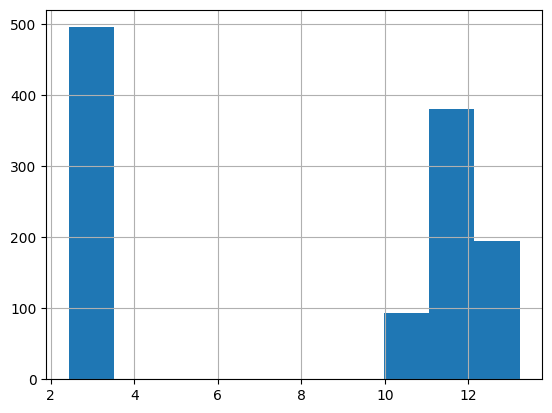

In [10]:
df_datos.IC.hist()

In [13]:
df_datos.duracion.value_counts()

duracion
818     38
845     36
1326    28
433     26
69      24
        ..
497      2
488      2
151      2
129      1
731      1
Name: count, Length: 116, dtype: int64

<Axes: >

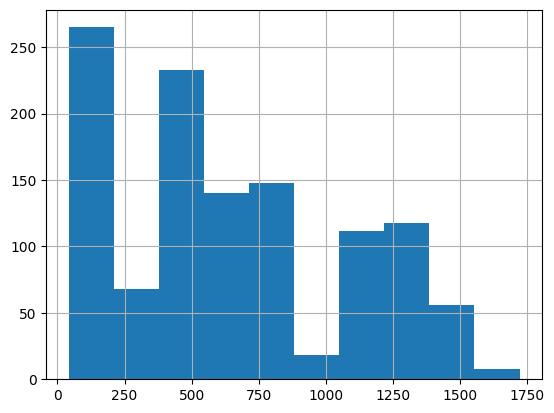

In [12]:
df_datos.duracion.hist()

Muchas veces es interesante en la misma exploración para "transformar y limpiar" hacer pequeñas visualizaciones para entender cómo están los datos.

Para hacer un EDA (Exploratory Data Analysis) no es necesario, pero cuando entremos en Machine Learning y Deep Learning veremos que todos los valores y valores de las columnas deben pasar a valores numéricos, y ya veremos cómo hacerlo.

## Categóricos

Con categóricos nos referimos a los valores (columnas en nuestro caso) de datos cuyo rango de valores está limitado y que suelen representar categorías o etiquetas. Por ejemplo, la columna "Categoria_IC":

In [14]:
df_datos["Categoria_IC"].value_counts()

Categoria_IC
C    576
A    496
B     94
Name: count, dtype: int64

Pero también podríamos considerar los Orígenes y Destinos, para este Dataset concreto. Ojo, podemos verlos como "etiquetas" o datos de categorías:

In [17]:
df_datos["Origen"].value_counts()

Origen
Bali           161
Ginebra        149
Cincinnati     136
Londres        127
Nueva York     123
París          107
Melbourne       99
Los Angeles     86
Cádiz           70
Roma            66
Barcelona       42
Name: count, dtype: int64

In [ ]:
### Para ver que tipos de categorias o más bien, cuantos tipos de categorias hay por cada columna

In [16]:
len(df_datos.Destino.unique())

11

El proceso para que pensemos en clasificar un dato, columna o característica como categórica (además de que nos lo digan exprofeso) es el de calcular la cardinalidad:

Por ejemplo la cardinalidad para la categoría IC

In [24]:
cardinalidad_IC = len(df_datos["Categoria_IC"].unique())/len(df_datos)*100

In [25]:
print(cardinalidad_IC)

0.2572898799313894


La de destino, empleando  el metodo de Pandas Unique

In [29]:
cardinalidad_destino=df_datos["Destino"].nunique()/len(df_datos)*100

In [30]:
print(cardinalidad_destino)

0.9433962264150944


In [31]:
cardinalidad_consumo =df_datos["consumo_kg"].nunique()/len(df_datos)*100

In [32]:
print(cardinalidad_consumo)

71.09777015437393


In [ ]:
## Cardinalidad de Consumo es una cardinalidad más alta, ya que los valores son numeros y no categorías como pasaba con destino

Con cardinalidades por debajo del 5-10% ya podríamos considerar el valor o columna como categórico. ¿Y eso por qué es importante? Por dos motivos principales:

1. **Para el EDA**: Suponen, en general, interesantes columnas o características para hacer agrupaciones y explorarlas.  
2. **Para Machine y Deep Learning**: Existen métodos de transformación a números bastante potentes y utilizados, por lo que suelen ser buenas características para incluir.

## Tipo Texto

Por valores de tipo texto entendemos aquellas columnas que son texto y no se pueden asimilar directamente a una categoría. Consideremos, por ejemplo, la columna "Incidencias":

In [33]:
df_datos["Incidencias"].value_counts()

Incidencias
Sin incidencias                                                      510
Mal funcionamiento del tren de aterrizaje                             33
Turbulencia severa                                                    31
Ave impacta con el avión                                              29
Aterrizaje de emergencia                                              25
                                                                    ... 
Despresurización de la cabina y Emergencia médica a bordo              1
Retraso extenso en la pista de despegue y Fallo eléctrico general      1
Complicaciones de navegación y Amenaza de seguridad a bordo            1
Sambódromo a bordo y Problemas de navegación                           1
Problemas con el suministro de combustible,                            1
Name: count, Length: 154, dtype: int64

Considerando la cardinalidad, podríamos intentar hacer de esta columna una categórica, pero observando el tipo de dato que tiene, con lenguaje natural que puede cambiar y, en general, es de por sí desestructurado y donde las abreviaturas, sinónimos, etc., lo hacen difícil de considerar de primeras. Lo normal es considerarlo como un campo de texto libre y tratarlo a partir de ahí.

En general, lo trataremos con técnicas de procesamiento de lenguaje natural y, otras veces además, obtendremos otras columnas con datos resumidos a partir de estas columnas de texto.

# Tipo Fecha

Como su nombre indica, hace referencia a los valores que son fechas. El hecho de que no sigan el sistema decimal y tengan sus particularidades de calendario (vamos, que 45 minutos más 55 minutos no sean 1 hora, sino 1 hora y 30 minutos, y que del 28 de Febrero a veces pasemos al 29 y otras al 1 de Marzo, por ejemplo) hace que haya que tratarlos de una forma un poco especial o de aprovechar las capacidades de Python y pandas para hacerlo.

En nuestro dataset, claramente “Hora_Vuelo” es de este tipo.

In [34]:
df_datos["Hora_Vuelo"].value_counts()

Hora_Vuelo
13:45 12/03/2023    1
23:00 19/04/2023    1
21:15 01/06/2023    1
10:30 26/03/2023    1
22:00 01/09/2023    1
                   ..
09:30 09/03/2023    1
16:45 22/07/2023    1
20:30 11/02/2023    1
15:15 29/04/2023    1
08:15 12/02/2023    1
Name: count, Length: 1166, dtype: int64

pero si miramosel tipo que considera Pandas

In [36]:
df_datos["Hora_Vuelo"].dtypes

dtype('O')